In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from scipy.signal import find_peaks
from scipy.optimize import curve_fit



# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

Index 258 is a good tester. Clear rotational signal, ambiguous peak mode.

Already have data downloaded for Gaia ID 3296334520042680064.
If you want to check for new data, run `janet.update()`.
No postcard object will be created for this target.
### Running Simple Astropy Lomb-Scargle on Sector 5 on star 3296334520042680064 ###
### Completed Simple Astropy Lomb-Scargle for Sector 5 on star 3296334520042680064 ###
### Saved results ###
### Running Wavelet Estimation for Sector 5 on star 3296334520042680064 ###


/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/jazz_hands-0.0.3-py3.8.egg/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/77 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 5 on star 3296334520042680064 ###
### Saved results ###
### Running Composite ACF estimation for Sector 5 on star 3296334520042680064 ###
### Completed Composite ACF estimation for Sector 5 on star 3296334520042680064 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 32 on star 3296334520042680064 ###
### Completed Simple Astropy Lomb-Scargle for Sector 32 on star 3296334520042680064 ###
### Saved results ###
### Running Wavelet Estimation for Sector 32 on star 3296334520042680064 ###


  0%|          | 0/78 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 32 on star 3296334520042680064 ###
### Saved results ###
### Running Composite ACF estimation for Sector 32 on star 3296334520042680064 ###
### Completed Composite ACF estimation for Sector 32 on star 3296334520042680064 ###
### Saved results ###
### Running ACF Estimation on star 3296334520042680064 ###
### Completed ACF Estimation on star 3296334520042680064 ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


/Users/oliver hall/Research/michael/Examples/../michael/plotting.py:322: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'{j.output_path}/{j.gaiaid}/output.pdf', rasterized=True)



------ Decoding Overall Period Flag 4 ------
4: Best rotation is from the Composite Autocorrelation Function (CACF) method.

No other flags raised. 

### Saved results ###


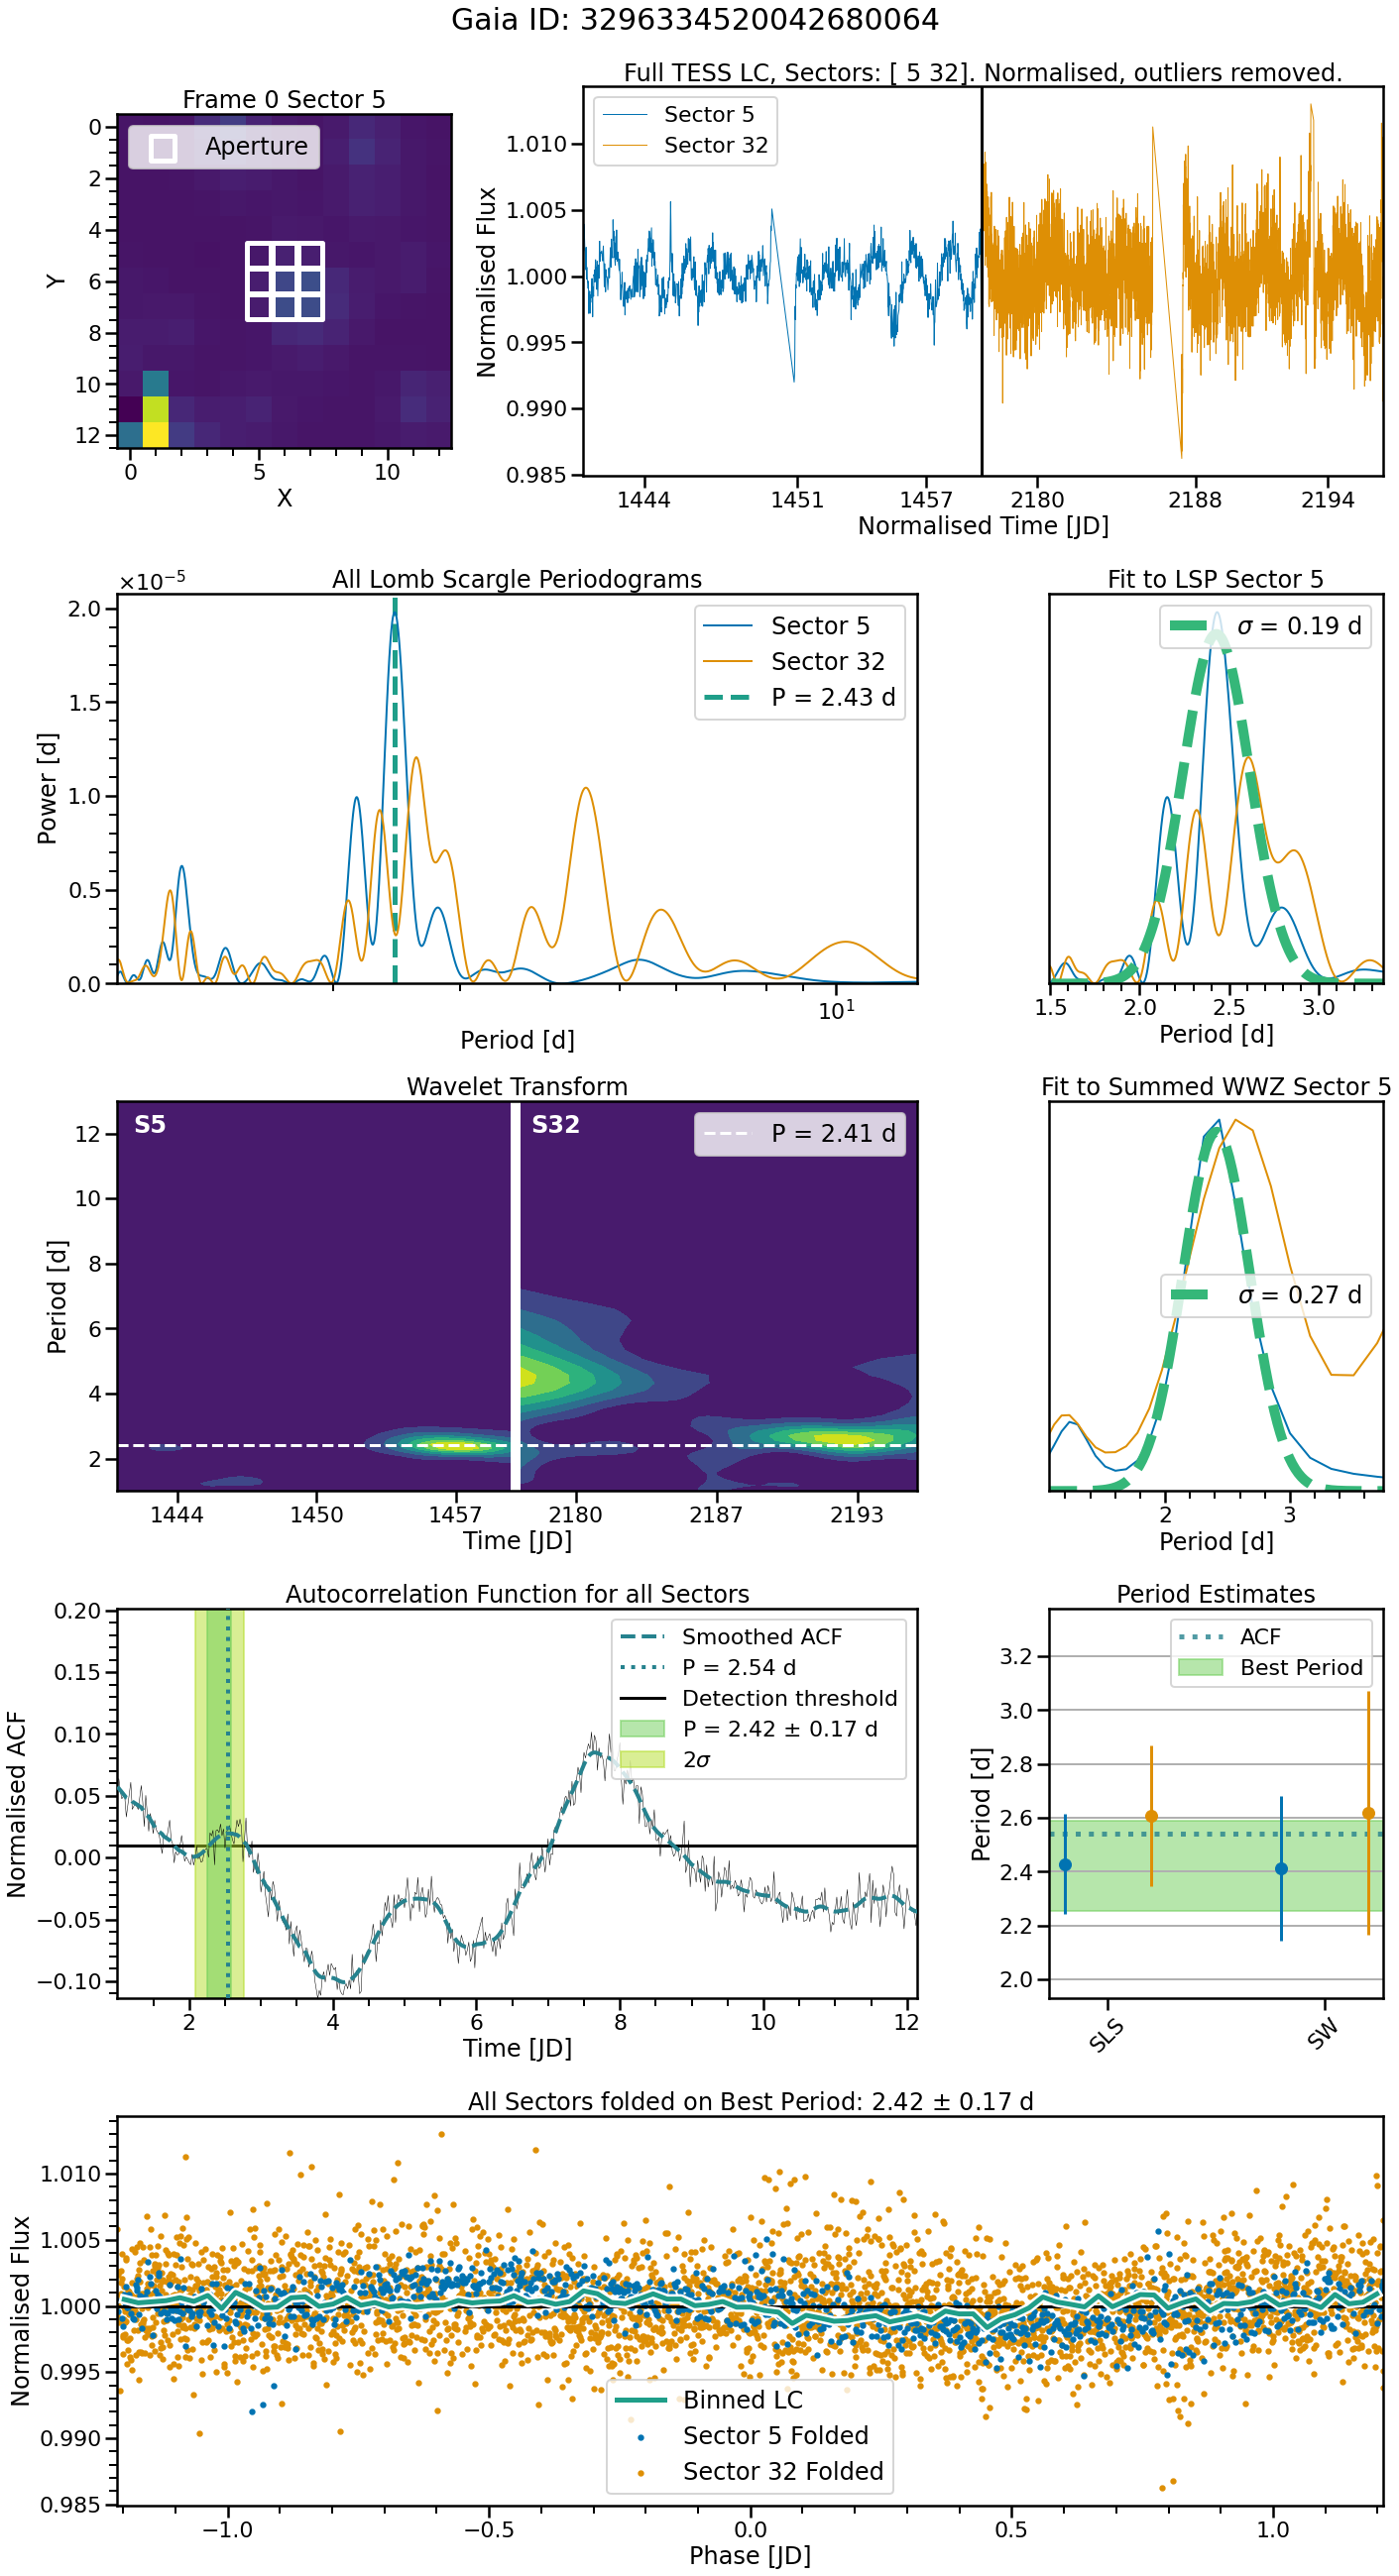

In [3]:
j = janet.boot(uni, index=24)
j.run(period_range = (1., 13.))

In [4]:
j.results

,SLS,e_SLS,f_SLS,SW,e_SW,CACF,e_CACF,ACF,s_SLS,s_SW,s_CACF,overall,e_overall,f_overall
5,2.428697,0.186747,0.0,2.41144,0.268079,2.538036,0.208864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2.607323,0.260732,0.0,2.61744,0.452918,2.423004,0.167382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.54175,NaN,NaN,NaN,NaN,NaN,NaN
best,2.428697,0.186747,0.0,2.41144,0.268079,2.423004,0.167382,NaN,5,5,32,2.423004,0.167382,4.0


In [5]:
sys.exit()

SystemExit: 

/Users/Anaconda/anaconda3/envs/rubrum/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
j.results.loc['best', 'SW'] *= 3

In [8]:
j.validate_rotation()

### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


In [9]:
j.decode(j.results.loc['best','f_overall'])


------ Decoding Overall Period Flag 20 ------
16: Only 2 of the 3 estimates of rotation agreed with one anotherto within 1 sigma.
4: Best rotation is from the Composite Autocorrelation Function (CACF) method.

No other flags raised. 



In [ ]:
      
best_cacf = '5'

fig, ax = plt.subplots(figsize=(6, 6))
ax.get_yaxis().set_visible(False)

x = j.void[f'{best_cacf}_cacf'].time.value
ax.plot(x,
        _gaussian_fn(x, *j.void[f'{best_cacf}_cacf_popt']), ls='--', lw=10, c=cmap[5], zorder=2)
#         label = rf'$\sigma$ = {j.results.loc["best", "e_SLS"]:.2f} d')
ax.set_xlim(j.void[f'{best_cacf}_cacf_popt'][0] - 5*j.void[f'{best_cacf}_cacf_popt'][1],
                j.void[f'{best_cacf}_cacf_popt'][0] + 5*j.void[f'{best_cacf}_cacf_popt'][1])

for s in j.sectors:
    ax.plot(j.void[f'{s}_cacf'].time.value, j.void[f'{s}_cacfsmoo'])
    
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('Period [d]')
ax.set_title(f'Fit to CACF {text}')        